Ref Link:
- https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
- https://www.jianshu.com/p/93c5715e7de4

In [22]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
df = quandl.get("WIKI/AAPL")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [8]:
df.index
# index 已是datetime
# df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=9400, freq=None)

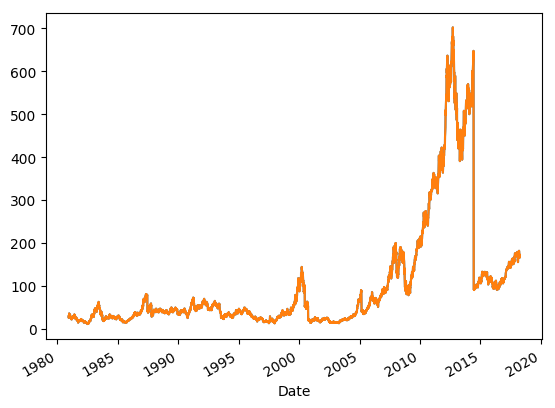

In [7]:
df['Close'].plot()
plt.show()

In [12]:
df.resample('W').mean()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-14,28.7500,28.870,28.75000,28.7500,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-21,26.7000,26.776,26.65000,26.6500,437620.0,0.0,1.0,0.392565,0.393683,0.391830,0.391830,24506720.0
1980-12-28,32.1275,32.250,32.12750,32.1275,209700.0,0.0,1.0,0.472365,0.474166,0.472365,0.472365,11743200.0
1981-01-04,35.0000,35.095,34.93750,34.9375,244925.0,0.0,1.0,0.514599,0.515995,0.513680,0.513680,13715800.0
1981-01-11,31.8980,31.922,31.80200,31.8020,176700.0,0.0,1.0,0.468990,0.469343,0.467579,0.467579,9895200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-04,177.2100,179.312,175.50600,177.3380,39286418.2,0.0,1.0,177.210000,179.312000,175.506000,177.338000,39286418.2
2018-03-11,176.3000,177.792,175.47600,177.0880,27688447.0,0.0,1.0,176.300000,177.792000,175.476000,177.088000,27688447.0
2018-03-18,180.0700,181.154,178.59002,179.3600,30344059.8,0.0,1.0,180.070000,181.154000,178.590020,179.360000,30344059.8


In [13]:
split_position = int(len(df) * 0.8)
train = df[:split_position]
test = df[split_position:]

In [20]:
test.index

DatetimeIndex(['2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14',
               '2010-10-15', '2010-10-18',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1880, freq=None)

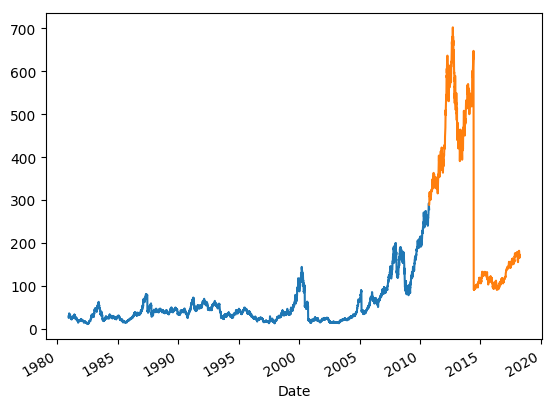

In [14]:
train['Close'].plot()
test['Close'].plot()
plt.show()

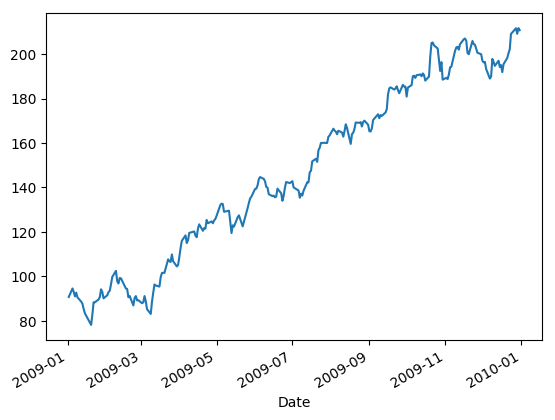

In [81]:
train['Close']['2009'].plot()
plt.show()

In [64]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
fit1.summary()

/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


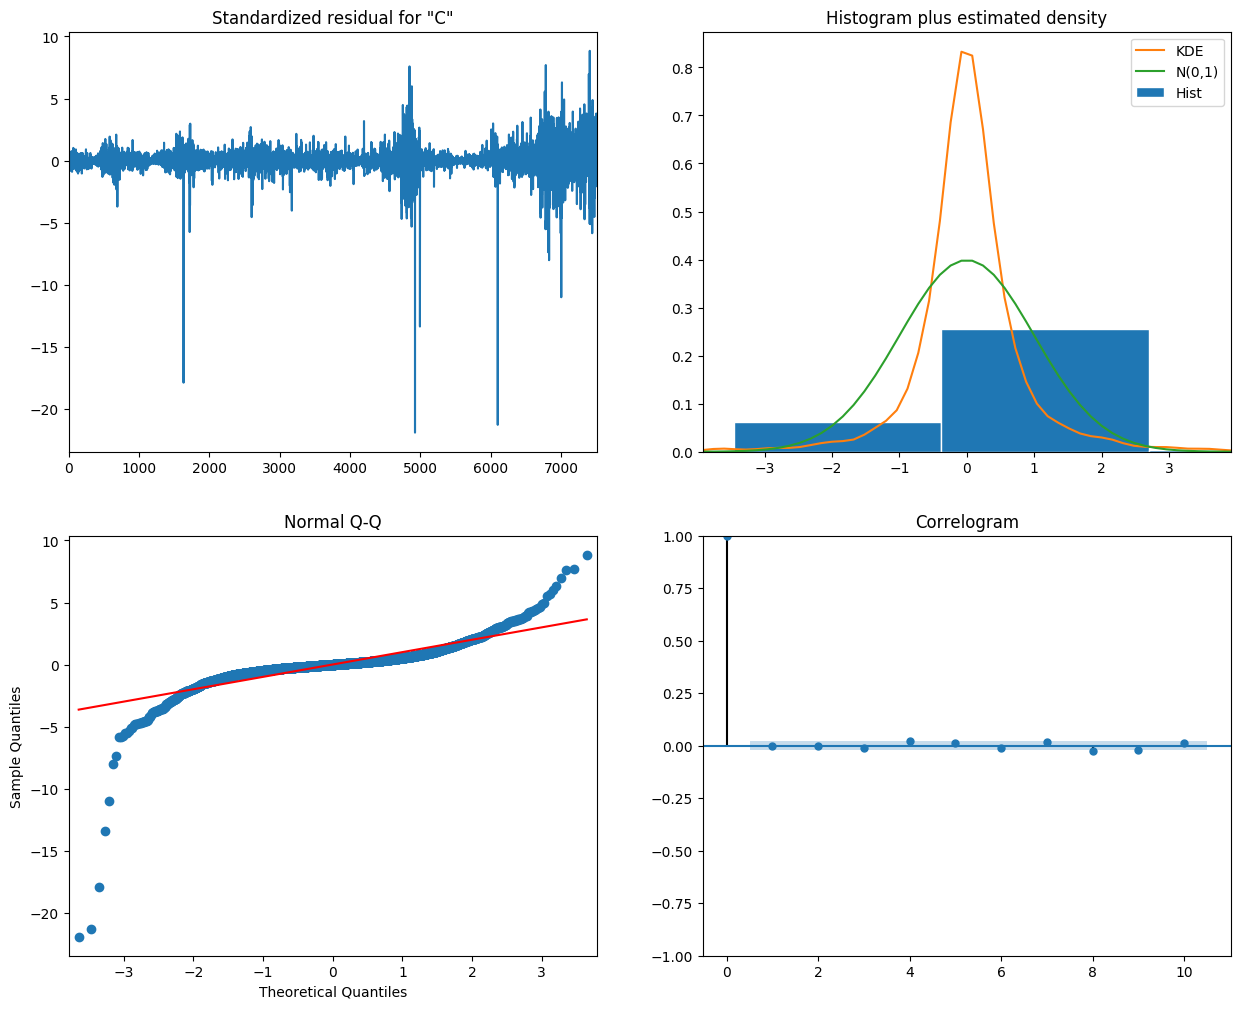

In [65]:
fit1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [40]:
predictions = fit1.forecast(1880)
predictions = pd.Series(predictions, index = predictions.index)
predictions

/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


7520    278.712910
7521    278.915178
7522    278.934437
7523    278.712721
7524    278.763284
           ...    
9395    341.024859
9396    341.112756
9397    341.193996
9398    341.171952
9399    341.123115
Name: predicted_mean, Length: 1880, dtype: float64

In [73]:
y_hat_avg['SARIMA'] = fit1.predict(start='2010-03-01', end='2010-04-01', dynamic=True)

In [74]:
y_hat_avg[['Close','SARIMA']]  # TODO check NaN. order?season?

,Close,SARIMA
Date,,
2010-10-05,288.940,NaN
2010-10-06,289.190,NaN
2010-10-07,289.220,NaN
2010-10-08,294.070,NaN
2010-10-11,295.360,NaN
...,...,...
2018-03-21,171.270,NaN
2018-03-22,168.845,NaN
2018-03-23,164.940,NaN


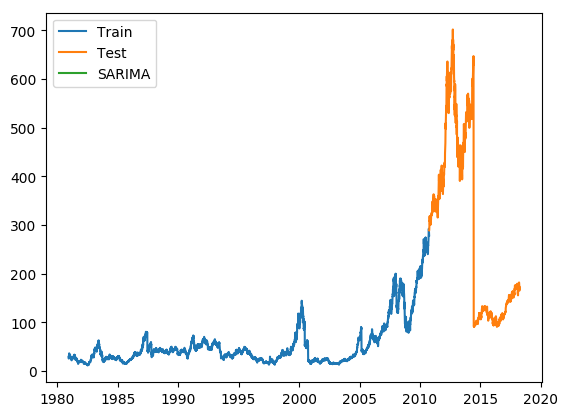

In [82]:
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

keras rnn: https://zhuanlan.zhihu.com/p/126196124

arima 模型问题总结https://blog.csdn.net/weixin_41013322/article/details/111221251
时间序列 案例 及步骤https://zhuanlan.zhihu.com/p/277446153
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

END